In [1]:
# used during development to releoad modules every time there is a change
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize
from risk_kit import Metrics, pre_processing_ind, pre_processing_hfi, plot_ef2
pd.options.display.float_format = '{:.6f}'.format

In [2]:
metrics = Metrics()

In [3]:
hfi = pre_processing_hfi()

assets = ["Distressed Securities"]
hfi = hfi["2000":][assets]
#print(hfi.head()
hfi.head()

/home/solidsnake/trading/portfolio_construction/risk_kit.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hfi = pd.read_csv("data/edhec-hedgefundindices.csv", header=0, index_col=0, parse_dates=True)


,Distressed Securities
date,
2000-01,0.008800
2000-02,0.042100
2000-03,0.010300
2000-04,-0.010100
2000-05,-0.013200


In [4]:
gaussian_var = hfi.agg(metrics.cornish_fisher_var, level=1, modified=False)
gaussian_var

Distressed Securities   0.031430
dtype: float64

In [5]:
modified_gaussian_var = hfi.agg(metrics.cornish_fisher_var, level=1, modified=True)
modified_gaussian_var

Distressed Securities   0.049669
dtype: float64

In [10]:
historical_var = hfi.agg(metrics.historical_var, level=1)
historical_var

Distressed Securities   0.042642
dtype: float64

In [19]:
ind = pre_processing_ind()
assets = ["Books", "Steel", "Oil", "Mines"]
ind_data = ind["2013": "2017"][assets]
ind_data.head()

,Books,Steel,Oil,Mines
2013-01,0.051300,0.042800,0.078800,0.005900
2013-02,-0.065400,-0.026800,0.005200,-0.075600
2013-03,0.077800,0.021000,0.020900,0.009100
2013-04,-0.002900,-0.044100,-0.012900,-0.105700
2013-05,0.047900,0.038400,0.030700,0.002200


In [20]:
ind_data.tail()

,Books,Steel,Oil,Mines
2017-08,-0.062900,0.016500,-0.052600,0.008300
2017-09,0.036000,0.037200,0.112500,-0.019500
2017-10,-0.018300,0.022300,0.002300,0.014500
2017-11,0.102400,-0.013800,0.028900,0.001500
2017-12,0.011100,0.131900,0.050900,0.115100


In [21]:
# Generate expected Return vector and Covariance matrix
rets = ind_data.agg(metrics.annualized_rets)
cov = ind_data.cov()

<Axes: xlabel='Vol'>

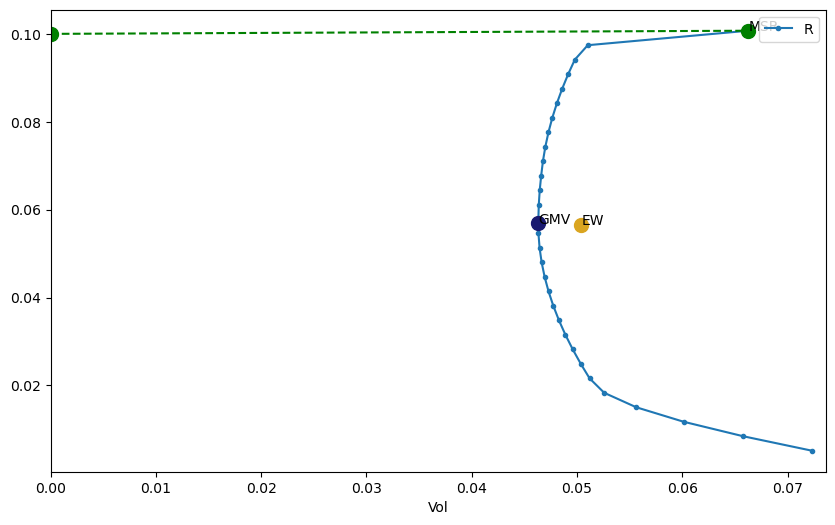

In [25]:
metrics.plot_ef(30, rets, cov, show_cml=True, \
                riskfree_rate=0.1, show_ew=True, show_gmv=True)

In [30]:
w_msr = metrics.maximum_sharpe_ratio(0.1, rets, cov)
w_msr

array([0.00000000e+00, 1.00000000e+00, 6.00214323e-16, 7.35522754e-16])

In [31]:
w_gmv = metrics.gmv(cov)
w_gmv

array([4.77024865e-01, 4.33680869e-19, 4.34112030e-01, 8.88631048e-02])

In [32]:
ind = pre_processing_ind()
assets = ["Books", "Steel", "Oil", "Mines"]
ind_data2 = ind["2018":][assets]
ind_data2.head()

,Books,Steel,Oil,Mines
2018-01,0.044900,0.036100,0.028600,0.035700
2018-02,-0.032500,-0.019900,-0.110200,-0.033500
2018-03,0.003100,-0.058600,0.030800,-0.001500
2018-04,-0.006200,0.036600,0.103000,-0.033900
2018-05,-0.006100,0.056200,0.034300,0.030800


In [ ]:
# Covariance of Portfolio in 2018
cov = ind_data2.cov()

In [37]:
# Volatility of MSR Portfolio
metrics.portfolio_vol(w_msr, cov)*np.sqrt(12)

0.21983988181484201

In [39]:
# Volatility of MSR Portfolio
metrics.portfolio_vol(w_msr, cov) * 12

0.7615476896664874

In [38]:
# Volatility of GMV Portfolio
metrics.portfolio_vol(w_gmv, cov)*np.sqrt(12)

0.18973734554913554